# Comparison to Baseline Models
We are interested in comparing the performance of our CNN to some standard classifiers: a support vector machine (SVM) and a Naive Bayes Classifier.
## SVM
__Decision Function and Predictions:__

The linear SVM classifier predicts the class of a new instance $\mathbf{x}$ by computing the decision function $\mathbf{w}^{T}\mathbf{x} +b = w_1x_1 + w_2x_2 + ... +w_nx_n + b$. If the result is positive, $\hat{y}$ is the positive class (1) or it is the negative class (0).

$\hat{y} = 0$ if $\mathbf{w}^T\mathbf{x} + b < 0$

$\hat{y} = 1$ if $\mathbf{w}^T\mathbf{x} + b \geq 0$

The decision boundary is a set of points where the decision function is equal to 0: the intersection of two planes. Training a linear SVM classifier means finding the values of $\mathbf{w}$ and $b$ s.t.  the margin is as wide as possible while avoiding margin violations.

__Training objective:__

The smaller the weight vector $\mathbf{w}$ the larger the margin, and vice versa. So we want to minimize $||\mathbf{w}||$ to get a large margin. However, if we also want to avoid margin violations, then we need the decision function to be greater than 1 for all positive training instances and lower than -1 for the negative training instances. We define $t^{(i)} = 1$ for the positive training instances and $t^{(i)} = -1$ for the negative instances. Thus, the constraint can be expressed as:

$t^{(i)}(\mathbf{w}^T\mathbf{x} +b) \geq 1$. 

Thus, the *Hard margin linear SVM classifier objective* is:

${min}_{\mathbf{w}, b}$ $\frac{1}{2}\mathbf{w}^T\mathbf{w}$

${s.t.} \ t^{(i)}(\mathbf{w}^T\mathbf{x} +b) \geq 1$ for $i = 1, 2, ..., m$

The *soft margin objective* requires a slack variable $\xi^{(i)} \geq 0$ for each instance which measures how much the ith instance is allowed to violate the margin. We have two conflicting objectives: trying to make the slack variables as small as possible to reduce the margin violations and making $\frac{1}{2}\mathbf{w}^T\mathbf{w}$ as small as possible to increase the margin. $C$ allows us to define the trade-off between the two objectives, giving us the constrained optimization problem:

${min}_{\mathbf{w}, b}$ $\frac{1}{2}\mathbf{w}^T\mathbf{w} + C \sum_{i=1}^{m} \xi^{(i)}$

${s.t.} \ t^{(i)}(\mathbf{w}^T\mathbf{x} +b) \geq 1 - \xi^{(i)}$ for $i = 1, 2, ..., m$

$\xi^{(i)} \geq 0$ for $i= 1, 2, ..., m$.

These are both convex quadratic optimization problems with linear constraints. A general quadratic opimization problem looks like:

$min$ $\frac{1}{2}\mathbf{p}^T\mathbf{H}\mathbf{p} + \mathbf{f}^T\mathbf{p}$

${s.t.} \ \mathbf{A}\mathbf{p} \leq \mathbf{b}$

where $\mathbf{A}\mathbf{p} \leq \mathbf{b}$ defines the $n_c$ constraints: $\mathbf{p}^T\mathbf{a}^{(i)} \leq b^{(i)}$ for $i = 1, 2, ..., n_c$. $n_c$ is the number of training instances, $\mathbf{H}$ is an identity matrix with a zaero in the upper left corner, $\mathbf{f} = \mathbf{0}$, $\mathbf{b} = \mathbf{-1}$, and $\mathbf{a}^{(i)} = -t^{(i)}\dot{\mathbf{x}}^{(i)}$ is an extra bias feature $\dot{\mathbf{x}_{0}} = 1$.

__Dual:__

This problem has a primal and a dual optimization problem. We find the optimal solution to the primal problem by minimizing the dual. This has solution:

$\hat{\mathbf{w}} = \sum_{i=1}^{m}\hat{\alpha}^{(i)}t^{(i)}\mathbf{x}^{(i)}$ and

$\hat{b} = \frac{1}{n_s} \sum_{i=1}^{m} (t^{(i)} - \hat{\mathbf{w}}^T\mathbf{x}^{(i)})$, with $\alpha^{(i)}  > 0$.

__Kernelized SVM:__

We can apply the transformation: $\phi(\mathbf{x})$, this can be done with with two two-dimensional vectors as well $\phi(\mathbf{a})^T\phi(\mathbf{b}) = (\mathbf{a}^T\mathbf{b}$. We can do this sort of trick with different kernels with the function: $K(\mathbf{a}, \mathbf{b})$:

Linear: $K(\mathbf{a}, \mathbf{b}) = \mathbf{a}^T\mathbf{b}$

Polynomial: $K(\mathbf{a}, \mathbf{b}) = (\gamma \mathbf{a}^T\mathbf{b} + r)^d$

Gaussian RBF: $K(\mathbf{a}, \mathbf{b}) = exp(-\gamma ||\mathbf{a} - \mathbf{b}||^2)$

Sigmoid: $K(\mathbf{a}, \mathbf{b}) = tanh(\gamma\mathbf{a}^T\mathbf{b} + r)$

*Look at Mercer's Thm. on page 165, Hands-On Machine Learning with Scikit-Learn and Tensorflow by Geron (2017)*

We can make predictions using the kernelized SVM that includes $\phi(x^{(i)})$ and $\hat{\mathbf{w}}$ must have the same number of dimensions. We can use dual solution to the primal to get the solution:

$h_{\hat{\mathbf{w}}, \hat{b}}(\phi(\mathbf{x}^{(n)})) = \hat{\mathbf{w}}^T\phi(\mathbf{x^{(n)}}) + \hat{b} = ... = \sum_{i = 1}^{m} \hat{\alpha^{(i)}} t^{(i)} K(\mathbf{x}^{(i)}, \mathbf{x}^{(n)}) + \hat{b}$ with $\hat{\alpha}^{(i)}>0$.

We have a bias term calculated as:

$\hat{b} = \frac{1}{n_s}\sum_{i=1}^m (t^{(i)} - \sum_{i=1}^m \hat{\alpha^{(i)}} t^{(i)} K(\mathbf{x}^{(i)}, \mathbf{x}^{(n)}))$.

__Hinge loss:__

The function $max(0, 1- t)$  is called the *hinge loss* function. It is equal to zero when $t \geq 1$. Its derivative is equal to -1 if $t<1$ and 0 is $t>1$, and is not differentiable at $t=1$.

We will use a Linear SVC model here, since we have a simple binary decision function.

In [18]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.feature_extraction.text import TfidfVectorizer
import tensorflow as tf
import glob
import nltk
import string
import pandas as pd
from sklearn.model_selection import cross_val_score
import seaborn as sns

nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\debro\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [19]:
# Create the dictionary
# NLTK tweets
from nltk.corpus import twitter_samples

tweets = twitter_samples.tokenized()
tweet_dict = []
for i in range(len(tweets)):
    for j in range(len(tweets[i])):
        tweet_dict.append(tweets[i][j])
        
# Pulled tweets
# Making a list directory of all the tweets we have collected
files_0 = glob.glob('./datasets/water_tweets/gathered_water/*.csv')
water1_tweets = pd.read_csv('./datasets/water_tweets/water1.csv', encoding = 'ISO-8859-1', delimiter = ',')

# loading JSON files
from pandas.io.json import json_normalize
with open('datasets/water_tweets/gathered_water/water8.json', 'r', encoding="utf-8") as json_file:
    water_json_1 = pd.read_json('datasets/water_tweets/gathered_water/water8.json', typ='object', orient='columns')
    water_json_1 = pd.io.json.json_normalize(water_json_1)
    water_json_1 = water_json_1[['text', 'timestamp']]

with open('datasets/water_tweets/gathered_water/water9_drought.json', 'r', encoding = 'utf-8') as json_file:
    water_json_2 = pd.read_json('datasets/water_tweets/gathered_water/water9_drought.json', typ='object', orient='columns')
    water_json_2 = pd.io.json.json_normalize(water_json_2)
    water_json_2 = water_json_2[['text', 'timestamp']]

water_jsons = pd.concat([water_json_1, water_json_2])
water_jsons.columns = ['text', 'date']
water_jsons['retweet_count'] = np.nan
water_jsons['category'] = np.nan
water_jsons['tweet_id'] = np.nan
water_jsons = water_jsons[['category', 'date', 'text', 'retweet_count', 'tweet_id']]

# Loading uniformly formatted pulled tweets
water_csvs = pd.concat([pd.read_csv(f, encoding = 'ISO-8859-1', delimiter = ';') for f in files_0])
water_csvs = pd.concat([water1_tweets, water_csvs, water_jsons])
water_csvs = water_csvs[['category', 'date', 'text', 'retweet_count', 'tweet_id']]
water_csvs = water_csvs[water_csvs['text'] != 'text']
water_csvs = water_csvs[water_csvs['category'] != 'pcb']
water_csvs = water_csvs[water_csvs['category'] != 'benzene']
files_1 = glob.glob('./datasets/water_tweets/rnd_tweets/*.csv')
rnd_csvs = pd.concat([pd.read_csv(f, encoding = 'ISO-8859-1', delimiter = ';') for f in files_1])
rnd_csvs = rnd_csvs[['category', 'date', 'text', 'retweet_count', 'tweet_id']]
rnd_csvs = rnd_csvs[rnd_csvs['text'] != 'text']
all_csvs = pd.concat([water_csvs, rnd_csvs])
all_csvs['text'] =  all_csvs['text'].astype(str)
all_csvs = all_csvs.drop_duplicates(subset = ['text'], keep = 'first').reset_index()
all_csvs = all_csvs.iloc[:, 1:]
# Tokenizing the tweet words from pulled tweets

tweet_text = list(all_csvs.text.astype(str))
for i in range(len(tweet_text)):
    tweet = tweet_text[i]
    tweet = tweet.translate(str.maketrans('','', string.punctuation))
    tweet = tweet.split()
    for j in range(len(tweet)):
        new_word = tweet[j]
        tweet_dict.append(new_word)
print(len(tweet_dict))

new_tweet_dict = []
for i in range(len(tweet_dict)):
    word = tweet_dict[i]
    word = word.translate(str.maketrans('', '', string.punctuation))
    word = word.lower()
    new_tweet_dict.append(word)

# Build the dictionary based on frequency of word appearance
from collections import Counter

vocabulary_size = 50000

# UNK = unknown words, HST = hashtag, EMT = emoticon, URL is self-explanatory, THDL = Twitter handle
vocabulary = [("<UNK>", None)] + [("<HST>", None)] + [("<EMT>", None)] + [("<URL>", None)] + [("<THDL>", None)] +\
            Counter(new_tweet_dict).most_common(vocabulary_size - 1)
vocabulary = np.array([word for word, _ in vocabulary])
dictionary = {word: code for code, word in enumerate(vocabulary)}
data = np.array([dictionary.get(word, 0) for word in new_tweet_dict])
print(len(vocabulary))
#print(len(data))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



9758649
50004


Many words are not important in the analysis of text. A `TfidfTransformer()` reweights the words/tokens in the vectorized tweets. "Tf" means term-frequency and "idf" means inverse document frequency.

${tfidf}(t,d) = {tf}(t,d) * {idf}(t)$

The term frequency, the number of times a term occurs in a given document, is multiplied with idf component, which is computed as:

${idf}(t) = log \frac{1+n}{1+{df}(t)} + 1$

where where $n$ is the total number of documents in the document set, and $df(t)$ is the number of documents in the document set that contain term. The resulting tf-idf vectors are then normalized by the Euclidean norm:

$v_{norm} = \frac{\mathbf{v}}{{||\mathbf{v}||}_2}$

We did use Tf-Idf correction for smoothing, which adds “1” to the numerator and denominator as if an extra document was seen containing every term in the collection exactly once, which prevents zero divisions:

In [20]:
# tf-idf vectorization
all_tweets = np.array(all_csvs.text)
water_csvs = water_csvs.drop_duplicates(subset = ['text'], keep = 'first')
water_tweets = np.array(water_csvs.text)
sampled_labeled_tweets = pd.read_csv('./datasets/water_tweets/sampled_tweets/labeled_tweets.csv',
                                    encoding = 'ISO-8859-1', delimiter = ';', header = 0)
print(sampled_labeled_tweets.head())
sampled_labeled_text = np.array(sampled_labeled_tweets.text)

   index         category                 date  \
0    473  water pollution             ########   
1    714              NaN  2011-08-19T23:59:48   
2    386      algae bloom             ########   
3   3203      flash flood             ########   
4   2573   chemical spill             ########   

                                                text  retweet_count  \
0  *@CBSNews Maybe the oil spill...'or water poll...            0.0   
1  Nigga we stranded Lmaoo RT @DAofficialLeXX: Ca...            NaN   
2        *@GabbyEWXXV *@WXXV25 Buh bye, algae bloom!            0.0   
3  Barry spares New Orleans but fuels fears of fl...            0.0   
4  ALERT: People living or working near an #EastR...            0.0   

       tweet_id Decision: Evan  Decision: 1  Decision: 2  Decision: 3  \
0  1.160000e+18              n          NaN          NaN          NaN   
1           NaN              n          NaN          NaN          NaN   
2  1.150000e+18              n          NaN          

In [27]:
# Ordinal vectorization of classes
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
ordinal_encoder = OrdinalEncoder()

y = ordinal_encoder.fit_transform(np.array(sampled_labeled_tweets['FINAL Decision']).ravel().reshape(-1, 1))
y = np.array(y)
print(y[:5])
print(ordinal_encoder.categories_)
cat_labels = ordinal_encoder.categories_

# If we get labeled data, we would use train_test_split to test out our model
#from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(sampled_labeled_text, y, test_size = 0.20,
                                                    random_state = 42, stratify = y)

# We use the vocabulary formulation from the embedding formed from the autoenconder_for_tweets.ipynb
vectorizer = TfidfVectorizer(strip_accents = 'unicode', stop_words = 'english', vocabulary = vocabulary)

# tf-idf vectorization of the training set
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.fit_transform(X_test)
#print(vectorizer.get_feature_names())
print(X_train_tfidf.shape, X_test_tfidf.shape)
#print(type(X_tfidf))
print(X_train[0])
print(X_train_tfidf[0])
print(y_train[:5])
print(y_test[:5])

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]]
[array(['Irrelevant', 'Relevant'], dtype=object)]
(8000, 50004) (2000, 50004)
Diane thought she was drinking water! ÃÂ°ÃÅ¸ÃËÃâÃÂ°ÃÅ¸ÃËÃâÃÂ°ÃÅ¸ÃËÃâ#BBNaija
  (0, 10457)	0.5982693307047374
  (0, 2604)	0.6142041353263676
  (0, 209)	0.4367555748183144
  (0, 86)	0.24457241531880405
  (0, 18)	0.1193984489695936
[[0.]
 [1.]
 [0.]
 [0.]
 [0.]]
[[1.]
 [0.]
 [0.]
 [0.]
 [1.]]


In [49]:
# SVM models
from sklearn.model_selection import GridSearchCV
param_distribs = {'C': [0.1, 1, 10, 20, 30, 40, 50, 100, 1000]}

svc_clf = LinearSVC(random_state = 42, max_iter = 10000, tol = 1e-4)
grid_search = GridSearchCV(svc_clf, param_grid=param_distribs,
                                cv=5, scoring=None, return_train_score = True)
grid_search.fit(X_train_tfidf, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                 fit_intercept=True, intercept_scaling=1,
                                 loss='squared_hinge', max_iter=10000,
                                 multi_class='ovr', penalty='l2',
                                 random_state=42, tol=0.0001, verbose=0),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 20, 30, 40, 50, 100, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [50]:
print(grid_search.best_estimator_,
     grid_search.best_params_)

LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=10000,
          multi_class='ovr', penalty='l2', random_state=42, tol=0.0001,
          verbose=0) {'C': 1}


In [51]:
from sklearn.metrics import accuracy_score
# best params
bsvc_clf = LinearSVC(C = 1, random_state = 42, max_iter = 10000, tol = 1e-5)
bsvc_clf.fit(X_train_tfidf, y_train)
y_pred_svc = bsvc_clf.predict(X_test_tfidf)
accuracy_score(y_test, y_pred_svc)

0.9045

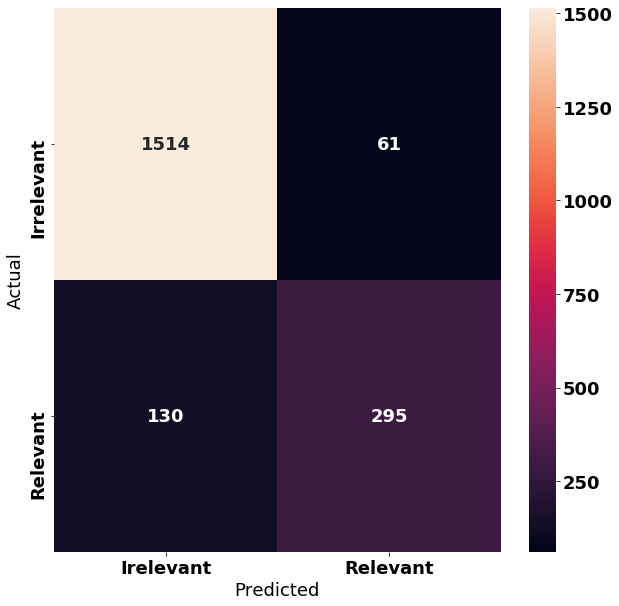

In [52]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, y_pred_svc)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=['Irelevant', 'Relevant'], yticklabels=['Irrelevant', 'Relevant'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 18}

plt.rc('font', **font)
#plt.savefig('svc_confusion.png')
plt.show()

In [40]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_svc, target_names=['Irrelevant', 'Relevant']))

              precision    recall  f1-score   support

  Irrelevant       0.92      0.96      0.94      1575
    Relevant       0.83      0.69      0.76       425

    accuracy                           0.90      2000
   macro avg       0.87      0.83      0.85      2000
weighted avg       0.90      0.90      0.90      2000



## Multinomial Naive Bayes Classifier
One of the text classification model will rely on a as a baseline comparison is a Naive Bayesian classifier. The tweets can be assigned a label from a finite set based on the characteristics of the tweet. The key is that the classifier will assume independence of the characteristics of the tweet, independence of the words used to construct the tweets, that would be used to determine the probability that the tweet should be assigned one of the classes.

Mathematically, the probability that a tweet would belong to a certain class, like ''fire'', is conditional. If we assume the features of the tweet are independent, have a tweet with $n$ features that are relevant to the classification of the tweet, this can be stored as a vector, $x = (x_1, x_2, ..., x_n)$. Say that there are $k$ different classes, $\{C_1, C_2, ..., C_k\}$, which the tweet could potentially be associated with. Based on the features of the tweet, we can assign a conditional probability to which class the tweet could belong to for any class $C_i, i \in \{1, 2, ... k\}$:
$\begin{equation}
    P(C_i | x_1, x_2, ..., x_n)
\end{equation}$

The obvious problem with this line of thinking is that the potential number of features for a tweet can be relatively large. Using Bayes' Theorem, the probability a tweet being associated with class $C_i$, would be:

$\begin{equation}
    P(C_i | x) = \frac{p(C_i)p(x|C_i)}{p(x)}
\end{equation}$

In other words, the probability that a tweet belongs to class $i$ is equal to the prior likelihood that a tweet belonged to class $i$ times the likelihood probability that this tweet belongs to class $i$, divided by the likelihood that the specific tweet exists in that order. Note that the numerator is really the only thing of interest here, as it is dependent on class $k$. Using the laws of conditional probability, we can rewrite the joint probability of the model:

$\begin{equation}
    P(C_i, x_1, ..., x_n) = P(x_1|x_2, ...,x_n, C_k) P(x_2,...,x_n, C_k)
\end{equation}$
$\begin{equation}
    =P(x_1|x_2, ..., x_n, C_k)P(x_2|x_3, ..., x_n, C_k)P(x_3, ..., x_n, C_k)=...
\end{equation}$
$\begin{equation}
    =P(x_1|x_2,..., x_n, C_k)P(x_2|x_3,..., x_n, C_k) ...P(x_n|C_k)P(C_k)
\end{equation}$

Yet, naive conditional independence implies that for any feature $x_j$ is conditionally independent of $x_l$, for any $j \neq l$, which translates to:

$\begin{equation}
    P(x_j| x_{j+1}, ..., x_n, C_k) = P(x_j|C_k)
\end{equation}$

This changes the conditional probability to:

$\begin{equation}
    P(C_k|x_1, ..., x_n) \propto P(C_k, x_1, ..., x_n)
\end{equation}$
$\begin{equation}
    =P(C_k) \prod_{i=1}^{n} P(x_i|C_k)
\end{equation}$

Using the independence assumptions, the probability of observing class $C_k$, given features $\{x_1, ..., x_n\}$ is:
$\begin{equation}
    \frac{P(C_k) \prod_{i=1}^{n} P(x_i|C_k)}{P(x_1, ..., x_n)}
\end{equation}$
$\begin{equation}
    =\frac{P(C_k) \prod_{i=1}^{n} P(x_i|C_k)}{\sum_{k}P(C_k)P(x_1, x_2,..., x_n|C_k)}
\end{equation}$

This is how probabilities are solved for using any distribution to determine $P(C_k|x_1, ..., x_n)$. We are using the multinomial distribution to determine the class probabilities. This means that $P(x_1, ..., x_n|C_k)$ is written as:

$\begin{equation}
    P(x_1, ..., x_n|C_k) = \frac{(\sum_i x_i)!}{\prod_i x_i!}\prod_i p_{ki}^{x_i}
\end{equation}$

where $p_{ki}$ is the probability of class $k$ associated with observation $i$.

In [42]:
from sklearn.naive_bayes import MultinomialNB
param_distribs = {
        'alpha': np.linspace(1, 50, num = 50).astype(int),
    }
mnb_clf = MultinomialNB()
grid_search = GridSearchCV(mnb_clf, param_grid=param_distribs,
                           cv=5, scoring=None)
grid_search.fit(X_train_tfidf, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=MultinomialNB(alpha=1.0, class_prior=None,
                                     fit_prior=True),
             iid='warn', n_jobs=None,
             param_grid={'alpha': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [43]:
print(grid_search.best_estimator_,
     grid_search.best_params_)

MultinomialNB(alpha=1, class_prior=None, fit_prior=True) {'alpha': 1}


In [45]:
# The default value was choosen
bmnb_clf = MultinomialNB(alpha = 1)
bmnb_clf.fit(X_train_tfidf, y_train)
y_pred_nb = bmnb_clf.predict(X_test_tfidf)
accuracy_score(y_test, y_pred_nb)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.859

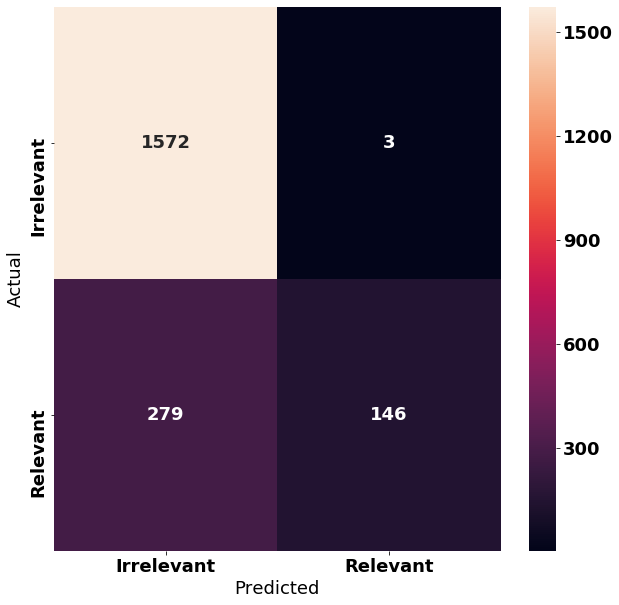

In [47]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred_nb)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=['Irrelevant', 'Relevant'], yticklabels=['Irrelevant', 'Relevant'])
plt.ylabel('Actual')
plt.xlabel('Predicted')

plt.show()

In [48]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_nb, target_names=['Irrelevant', 'Relevant']))

              precision    recall  f1-score   support

  Irrelevant       0.85      1.00      0.92      1575
    Relevant       0.98      0.34      0.51       425

    accuracy                           0.86      2000
   macro avg       0.91      0.67      0.71      2000
weighted avg       0.88      0.86      0.83      2000

